### Installing Required Packages

Before starting, we need to install the necessary packages such as `Random Forest `, `xgboost`, `ElasticNet`,`LSTM `,`WaveNet `,`ARIMA`,`SARIMA `, `prophet`, and `catboost`. To install these packages, use the following command:


In [1]:
!pip install tensorflow xgboost statsmodels prophet catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.1 MB/s eta 0:00:00


**MileStone #3** </br>
First we import the important libraries

### Importing Required Libraries

In this section, we import all the necessary libraries that are needed for data processing, model training, and evaluation.

1. **Data Manipulation and Preprocessing**:
    - `numpy`: Used for numerical operations and handling arrays.
    - `pandas`: Essential for data manipulation and reading datasets (e.g., CSV files).
    - `MinMaxScaler`, `StandardScaler`: For scaling/normalizing data.
    
2. **Modeling and Machine Learning Algorithms**:
    - `XGBRegressor`: The XGBoost model, which is a gradient boosting method for regression.
    - `CatBoostRegressor`: A gradient boosting model optimized for categorical features.
    - `ElasticNet`: A linear regression model with both L1 and L2 regularization.
    - `RandomForestRegressor`: A tree-based ensemble method for regression tasks.
    - `SVR`: Support Vector Regression model.
    - `ARIMA` and `SARIMAX`: Time series forecasting models for autoregressive integrated moving average and seasonal autoregressive integrated moving average, respectively.
    - `Prophet`: A time series forecasting tool, particularly good for daily and seasonal data.
    - `VAR`: Vector Autoregression model used for multivariate time series data.

3. **Deep Learning**:
    - `Sequential`, `LSTM`, `Dense`, `Conv1D`, `MaxPooling1D`, `Flatten`: Used to build deep learning models like LSTM and WaveNet.
    - `Adam`: Optimizer for training deep learning models.

4. **Model Selection and Evaluation**:
    - `GridSearchCV`: Used for hyperparameter tuning by searching across a parameter grid.
    - `train_test_split`: To split the dataset into training and testing sets.
    - `mean_squared_error`, `mean_absolute_error`, `r2_score`, etc.: Metrics to evaluate the model’s performance.

5. **Serialization**:
    - `joblib`: To save and load models after training for later use.

6. **Data Path**:
    - The dataset is located at the path `'/content/walmart_cleaned_machine.csv'`.

This setup prepares all the necessary tools for building, training, evaluating, and saving various machine learning and deep learning models.

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from joblib import dump, load
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from statsmodels.tsa.api import VAR
from catboost import CatBoostRegressor

datapath = r'/content/walmart_cleaned_machine.csv'

### Loading and Preparing the Data

In this step, we load the dataset and prepare it for time series analysis:

1. **Loading the Data**:
   - We use `pandas.read_csv()` to load the dataset from a CSV file located at `'/content/walmart_cleaned_machine.csv'`. The `parse_dates` parameter ensures that the **'date'** column is parsed as a datetime object, which is crucial for time series analysis.

2. **Setting Frequency for Time Series**:
   - The method `df.asfreq('W')` is used to set the frequency of the dataset to weekly (**'W'**), which is important for time series models like ARIMA and SARIMAX that rely on the data's time intervals.

3. **Previewing the Data**:
   - We use `df.head()` to preview the first few rows of the dataset, allowing us to inspect its structure and check that the data has been loaded and formatted correctly.

In [5]:
df = pd.read_csv(r'/content/walmart_cleaned_machine.csv', parse_dates=['date'])

# For the ARIMA and SARIMAX
df.asfreq('W')

df.head()

,Store,Dept,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Month,Year,WeekOfYear,Quarter,Season,IsPromoWeek,date
0,1,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,151315,2,2010,5,1,0,False,2010-02-05
1,1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,151315,2,2010,6,1,0,True,2010-02-12
2,1,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,151315,2,2010,7,1,0,False,2010-02-19
3,1,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,151315,2,2010,8,1,0,False,2010-02-26
4,1,1,1554806.68,0,46.50,2.625,211.350143,8.106,2,151315,3,2010,9,1,1,False,2010-03-05


### Visualizing Weekly Sales Trends Over Time

This visualization provides insights into **weekly sales patterns** across different years using a line plot:

1. **Plot Setup**:
   - The figure size is set to `(12, 6)` for a wide, readable plot.

2. **Line Plot**:
   - The plot uses Seaborn's `lineplot()` function.
   - `x='Month'` and `y='Weekly_Sales'` show how sales vary month-by-month.
   - The `hue='Year'` argument distinguishes lines by year, allowing comparison of seasonal trends across different years.

3. **Purpose**:
   - This graph helps identify recurring **seasonal trends**, **yearly performance variations**, and potential **anomalies** in sales behavior.

4. **Note**:
   - It assumes your DataFrame `df` includes preprocessed `Month` and `Year` columns extracted from a date column.


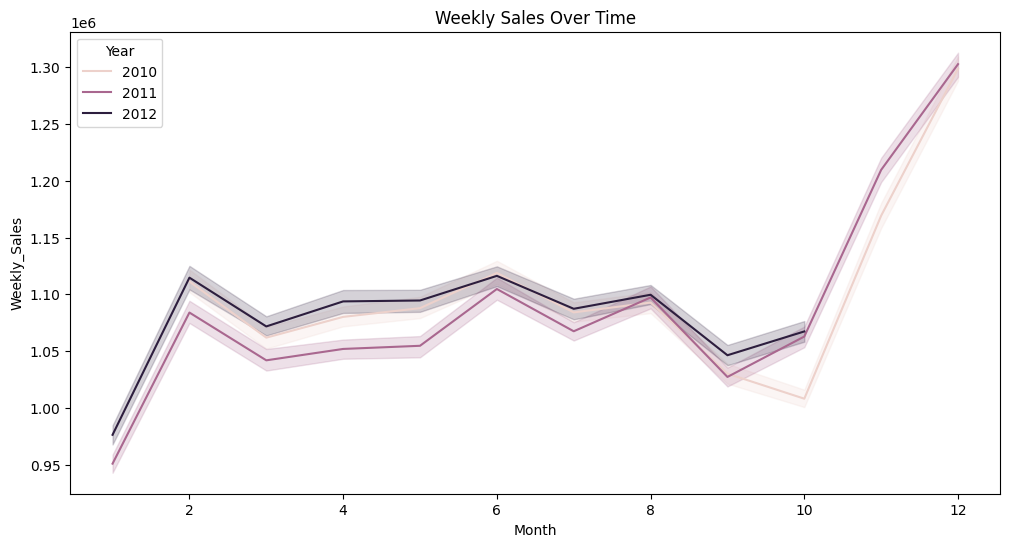

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has a 'Date' column
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month', y='Weekly_Sales', hue='Year')
plt.title("Weekly Sales Over Time")
plt.show()

### Monthly Sales Distribution with Holiday Context

This bar chart visualizes how **weekly sales** vary by **month**, highlighting the influence of holidays:

1. **Bar Plot Configuration**:
   - Uses `Month` on the x-axis and `Weekly_Sales` on the y-axis.
   - The `hue='Holiday_Flag'` splits bars into **holiday** and **non-holiday** categories for each month.

2. **Purpose**:
   - Helps identify whether **holidays have a significant impact** on sales performance.
   - Enables quick visual comparison of sales patterns across months and between holiday vs. non-holiday periods.

3. **Interpretation Tips**:
   - Taller bars indicate higher average weekly sales for that category.
   - Differences between holiday and non-holiday bars in the same month can suggest the **effect of promotions, events, or consumer behavior shifts**.


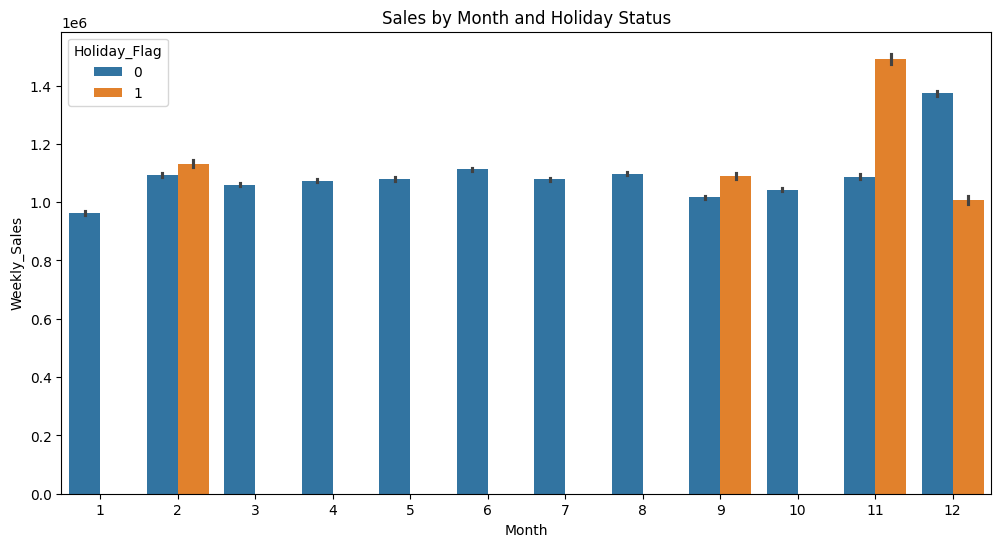

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has a 'Month' column
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Month', y='Weekly_Sales', hue='Holiday_Flag')
plt.title("Sales by Month and Holiday Status")
plt.show()

### Preparing the Data for All Models

This section of the code is dedicated to preparing the data for each model before training begins. The process involves various data transformations to ensure compatibility with different machine learning models:

1. **Loading the Data**:
    - We load the dataset from a CSV file using **pandas**.

2. **Feature Scaling**:
    - We use **StandardScaler** to standardize the features to ensure they have a mean of 0 and a standard deviation of 1. This is important for models like **SVR**, **ElasticNet**, and tree-based models (like **XGBoost** and **CatBoost**) that are sensitive to the scale of the data.
    - The features we scale are: `'Fuel_Price'`, `'Temperature'`, `'CPI'`, `'Unemployment'`, `'Size'`, and `'Weekly_Sales'`.

3. **Preparing Input and Output Variables**:
    - **X** represents the features (independent variables), and **y** represents the target variable (`Weekly_Sales`).

4. **Splitting the Data**:
    - We split the data into training and testing sets using **train_test_split** from **sklearn** with 80% for training and 20% for testing. This is used for models such as **XGBoost**, **CatBoost**, **SVR**, **RandomForestRegressor**, and **ElasticNet**.

5. **Sequence Creation for Time Series Models**:
    - For models like **LSTM** and **WaveNet** that require sequential input, we define the function `create_sequences` to generate sequences of data (with `time_steps=10`). This creates lag features that the models can use to learn temporal patterns.

6. **Preparing Data for ARIMA and SARIMA**:
    - For **ARIMA** and **SARIMA**, we prepare the target variable (`Weekly_Sales`) for training and testing without the need for scaling or sequence creation.

7. **Printing Data Shapes**:
    - Finally, we print the shapes of the training and testing datasets to confirm that the data is correctly formatted for the models.

This process ensures that the data is ready for a variety of machine learning models with specific preprocessing requirements.

In [12]:
data = pd.read_csv(datapath)

scaler = StandardScaler()

features = ['Fuel_Price', 'Temperature', 'CPI', 'Unemployment','Size', 'Weekly_Sales']

data[features] = scaler.fit_transform(data[features])

X = data.drop(columns=['Weekly_Sales', 'date'])
y = data['Weekly_Sales'].values.reshape(-1, 1)

# This is used for XGBoost, CatBoost, SVR, RFR, ElasticNet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# This is for LSTM and WaveNet
def create_sequences(X, y, time_steps=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq, dtype=np.float32), np.array(y_seq, dtype=np.float32)

X_train_seq, y_train_seq = create_sequences(X_train, y_train)
X_test_seq, y_test_seq = create_sequences(X_test, y_test)

# For ARIMA & SARIMA
train_ts, test_ts = y_train, y_test

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_train_seq shape: {X_train_seq.shape}')
print(f'y_train_seq shape: {y_train_seq.shape}')

X_train shape: (57570, 15)
y_train shape: (57570, 1)
X_train_seq shape: (57560, 10, 15)
y_train_seq shape: (57560, 1)


### Training the  Models

In this section, we train the models with their respective parameters. Each model has its own set of hyperparameters that are fine-tuned to achieve optimal performance.

1. **Training the XGBoost Model**:
    - We start by initializing the **XGBRegressor** model with the following hyperparameters:
        - **n_estimators**: The number of boosting rounds (200).
        - **max_depth**: The maximum depth of the decision trees (7).
        - **learning_rate**: The rate at which the model learns (0.01).
        - **subsample**: The fraction of samples used to build each tree (0.8).
        - **colsample_bytree**: The fraction of features used to build each tree (1.0).
        - **objective**: The objective function used for regression tasks (`'reg:squarederror'`).
        - **random_state**: A random seed to ensure reproducibility (42).
    
    - After initializing the model, we fit it to the training data (**X_train**, **y_train**).

2. **Confirmation**:
    - After training the model, we print a message confirming that **XGBoost** has been successfully trained.

This training process ensures that the XGBoost model is ready for making predictions and evaluations.

In [13]:
xgb_model = XGBRegressor(n_estimators= 200, max_depth=7, learning_rate=0.01, subsample=0.8, colsample_bytree=1.0,objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
print(f'XGBoost has been trained!')

XGBoost has been trained!


### Training the CatBoost Model

In this section, we train the **CatBoostRegressor** model with the specified parameters:

1. **Training the CatBoost Model**:
    - We initialize the **CatBoostRegressor** model with the following hyperparameters:
        - **iterations**: The number of boosting iterations (10000).
        - **learning_rate**: The rate at which the model learns during each iteration (0.1).
        - **verbose**: Controls the verbosity of the training process (set to 1 to display training progress).

    - After initializing the model, we fit it to the training data (**X_train**, **y_train**).

2. **Confirmation**:
    - Once the model has been trained, we print a message confirming that **CatBoost** has been successfully trained.

This process ensures that the CatBoost model is ready for predictions and further evaluation.

In [14]:
catboost_model = CatBoostRegressor(iterations=10000, learning_rate=0.1, verbose=1)
catboost_model.fit(X_train, y_train)
print(f'CatBoost has been trained!')

Streaming output truncated to the last 5000 lines.
5001:	learn: 0.0000148	total: 46.7s	remaining: 46.7s
5002:	learn: 0.0000148	total: 46.8s	remaining: 46.7s
5003:	learn: 0.0000148	total: 46.8s	remaining: 46.7s
5004:	learn: 0.0000148	total: 46.8s	remaining: 46.7s
5005:	learn: 0.0000147	total: 46.8s	remaining: 46.7s
5006:	learn: 0.0000147	total: 46.8s	remaining: 46.7s
5007:	learn: 0.0000147	total: 46.8s	remaining: 46.6s
5008:	learn: 0.0000147	total: 46.8s	remaining: 46.6s
5009:	learn: 0.0000146	total: 46.8s	remaining: 46.6s
5010:	learn: 0.0000146	total: 46.8s	remaining: 46.6s
5011:	learn: 0.0000146	total: 46.8s	remaining: 46.6s
5012:	learn: 0.0000146	total: 46.8s	remaining: 46.6s
5013:	learn: 0.0000146	total: 46.8s	remaining: 46.6s
5014:	learn: 0.0000146	total: 46.9s	remaining: 46.6s
5015:	learn: 0.0000145	total: 46.9s	remaining: 46.6s
5016:	learn: 0.0000145	total: 46.9s	remaining: 46.6s
5017:	learn: 0.0000145	total: 46.9s	remaining: 46.6s
5018:	learn: 0.0000145	total: 46.9s	remaining: 4

### Training the Random Forest Regressor Model

In this section, we train the **RandomForestRegressor** model with the specified parameters:

1. **Training the Random Forest Regressor**:
    - We initialize the **RandomForestRegressor** model with the following hyperparameters:
        - **n_estimators**: The number of trees in the forest (200).
        - **random_state**: A random seed to ensure reproducibility (42).

    - After initializing the model, we fit it to the training data (**X_train**, **y_train**).

2. **Confirmation**:
    - Once the model has been trained, we print a message confirming that the **Random Forest Regressor** has been successfully trained.

This ensures that the Random Forest Regressor model is ready for predictions and further analysis.

In [16]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
print(f'Random Forest Regressor has been trained!')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor has been trained!


### Hyperparameter Tuning for XGBoost Model using GridSearchCV

In this section, we use **GridSearchCV** to find the best hyperparameters for the **XGBoost** model by performing an exhaustive search over a specified parameter grid:

1. **Defining the Hyperparameters Grid**:
    - We define a dictionary `xgb_params` that contains the possible values for the following hyperparameters:
        - **n_estimators**: Number of boosting rounds (100 or 200).
        - **max_depth**: Maximum depth of the trees (4, 6, or 8).
        - **learning_rate**: Rate at which the model learns (0.01 or 0.1).
        - **subsample**: Fraction of samples used to train each tree (0.8 or 1.0).
        - **colsample_bytree**: Fraction of features used to train each tree (0.8 or 1.0).

2. **GridSearchCV Setup**:
    - We initialize the **GridSearchCV** with the following parameters:
        - **estimator**: The base model, in this case, an **XGBRegressor** with `objective='reg:squarederror'` and a fixed `random_state=42`.
        - **param_grid**: The hyperparameters to search over (`xgb_params`).
        - **scoring**: The evaluation metric used for selecting the best model (`neg_mean_squared_error`).
        - **cv**: The number of cross-validation folds (3).
        - **n_jobs**: The number of CPU cores to use during the search (set to -1 to use all available cores).
        - **verbose**: The verbosity level of the output (set to 1 to show progress).

3. **Fitting the Model**:
    - We fit the **GridSearchCV** to the training data (**X_train**, **y_train**) to perform the hyperparameter search.

4. **Best Model Selection**:
    - Once the search is complete, we print the best parameters found during the search and extract the best estimator (model) with `xgb_grid.best_estimator_`.

This process ensures that the **XGBoost** model is trained with the optimal hyperparameters for better performance.


In [17]:
from sklearn.model_selection import GridSearchCV
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_grid = GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
                        param_grid=xgb_params, scoring='neg_mean_squared_error',
                        cv=3, n_jobs=-1, verbose=1)

xgb_grid.fit(X_train, y_train)
print("Best parameters for XGBoost:", xgb_grid.best_params_)
xgb_model = xgb_grid.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.8}


### Hyperparameter Tuning for CatBoost Model using GridSearchCV

In this section, we use **GridSearchCV** to find the best hyperparameters for the **CatBoost** model by performing an exhaustive search over a specified parameter grid:

1. **Defining the Hyperparameters Grid**:
    - We define a dictionary `cat_params` that contains the possible values for the following hyperparameters:
        - **iterations**: The number of boosting iterations (500 or 1000).
        - **learning_rate**: The rate at which the model learns (0.01 or 0.1).
        - **depth**: The depth of the trees (6, 8, or 10).

2. **GridSearchCV Setup**:
    - We initialize the **GridSearchCV** with the following parameters:
        - **estimator**: The base model, in this case, a **CatBoostRegressor** with `verbose=0` to suppress training output.
        - **param_grid**: The hyperparameters to search over (`cat_params`).
        - **scoring**: The evaluation metric used for selecting the best model (`neg_mean_squared_error`).
        - **cv**: The number of cross-validation folds (3).
        - **n_jobs**: The number of CPU cores to use during the search (set to -1 to use all available cores).
        - **verbose**: The verbosity level of the output (set to 1 to show progress).

3. **Fitting the Model**:
    - We fit the **GridSearchCV** to the training data (**X_train**, **y_train**) to perform the hyperparameter search.

4. **Best Model Selection**:
    - Once the search is complete, we print the best parameters found during the search and extract the best estimator (model) with `catboost_grid.best_estimator_`.

This process ensures that the **CatBoost** model is trained with the optimal hyperparameters for improved performance.


In [18]:
from sklearn.model_selection import GridSearchCV
cat_params = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.1],
    'depth': [6, 8, 10]
}

catboost_grid = GridSearchCV(estimator=CatBoostRegressor(verbose=0),
                             param_grid=cat_params, scoring='neg_mean_squared_error',
                             cv=3, n_jobs=-1, verbose=1)

catboost_grid.fit(X_train, y_train)
print("Best parameters for CatBoost:", catboost_grid.best_params_)
catboost_model = catboost_grid.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for CatBoost: {'depth': 10, 'iterations': 1000, 'learning_rate': 0.1}


### Hyperparameter Tuning for Random Forest Regressor using GridSearchCV

In this section, we use **GridSearchCV** to find the best hyperparameters for the **RandomForestRegressor** model by performing an exhaustive search over a specified parameter grid:

1. **Defining the Hyperparameters Grid**:
    - We define a dictionary `rf_params` that contains the possible values for the following hyperparameters:
        - **n_estimators**: The number of trees in the forest (100 or 200).
        - **max_depth**: The maximum depth of the trees (`None`, 10, or 20).
        - **min_samples_split**: The minimum number of samples required to split an internal node (2 or 5).

2. **GridSearchCV Setup**:
    - We initialize the **GridSearchCV** with the following parameters:
        - **estimator**: The base model, in this case, a **RandomForestRegressor** with a fixed `random_state=42` for reproducibility.
        - **param_grid**: The hyperparameters to search over (`rf_params`).
        - **scoring**: The evaluation metric used for selecting the best model (`neg_mean_squared_error`).
        - **cv**: The number of cross-validation folds (3).
        - **n_jobs**: The number of CPU cores to use during the search (set to -1 to use all available cores).
        - **verbose**: The verbosity level of the output (set to 1 to show progress).

3. **Fitting the Model**:
    - We fit the **GridSearchCV** to the training data (**X_train**, **y_train**) to perform the hyperparameter search.

4. **Best Model Selection**:
    - Once the search is complete, we print the best parameters found during the search and extract the best estimator (model) with `rf_grid.best_estimator_`.

This process ensures that the **RandomForestRegressor** model is trained with the optimal hyperparameters for better performance.


In [19]:
from sklearn.model_selection import GridSearchCV
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                       param_grid=rf_params, scoring='neg_mean_squared_error',
                       cv=3, n_jobs=-1, verbose=1)

rf_grid.fit(X_train, y_train)
print("Best parameters for Random Forest:", rf_grid.best_params_)
rf_model = rf_grid.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


### Training the ElasticNet Model

In this section, we train the **ElasticNet** model with the specified parameters:

1. **Training the ElasticNet Model**:
    - We initialize the **ElasticNet** model with the following hyperparameters:
        - **alpha**: The regularization strength (1.0). Higher values of **alpha** increase regularization.
        - **l1_ratio**: The mixing parameter between Lasso (L1) and Ridge (L2) regularization (0.5). A value of 0.5 indicates equal mixing of both types of regularization.
        - **random_state**: A random seed to ensure reproducibility (42).

    - After initializing the model, we fit it to the training data (**X_train**, **y_train**).

2. **Confirmation**:
    - Once the model has been trained, we print a message confirming that the **ElasticNet** model has been successfully trained.

This process ensures that the **ElasticNet** model is ready for predictions and further analysis.

In [20]:
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_model.fit(X_train, y_train)
print(f'ElasticNet has been trained!')

ElasticNet has been trained!


### Training the LSTM Model

In this section, we train the **LSTM (Long Short-Term Memory)** model, which is used for time series forecasting. LSTM is a type of recurrent neural network (RNN) that is well-suited for sequential data like time series.

1. **Building the LSTM Model**:
    - We initialize a **Sequential** model, which allows stacking layers.
    - The first layer is an **LSTM** layer with:
        - **50 units**: The number of neurons in the LSTM layer.
        - **activation='relu'**: The activation function used for the neurons (ReLU).
        - **input_shape**: The shape of the input data, which corresponds to the number of time steps and features in the sequences (`X_train_seq.shape[1], X_train_seq.shape[2]`).
    - The second layer is a **Dense** layer with 1 output unit, corresponding to the predicted value.

2. **Compiling the Model**:
    - The model is compiled with:
        - **optimizer**: Adam optimizer with a learning rate of 0.001.
        - **loss**: Mean squared error (MSE) as the loss function.

3. **Training the Model**:
    - The model is trained on the training data (**X_train_seq**, **y_train_seq**) for **20 epochs** with a **batch size of 32**.
    - The **verbose=1** option provides progress updates during training.

4. **Confirmation**:
    - Once the model has been trained, we print a message confirming that the **LSTM** model has been successfully trained.

This process ensures that the **LSTM** model is ready for predictions and further evaluation on sequential data.

In [21]:
lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dense(1)
])

lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
lstm.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, verbose=1)
print(f'LSTM has been trained!')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 115.3876
Epoch 2/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1877
Epoch 3/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1.1470
Epoch 4/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.1469
Epoch 5/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1487
Epoch 6/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.1360
Epoch 7/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1.1298
Epoch 8/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1516
Epoch 9/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0996
Epoch 10/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0920
Epoch 11/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0768
Epoch 12/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0869
Epoch 13/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0724
Epoch 14/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0817
Epoch 15/20
1799/1799 ━━━

### Training the WaveNet Model

In this section, we train the **WaveNet** model, which is a deep learning model often used for sequence modeling tasks, particularly time series forecasting.

1. **Building the WaveNet Model**:
    - We initialize a **Sequential** model, which allows stacking layers.
    - The first layer is a **Conv1D** (1D Convolutional) layer with:
        - **64 filters**: The number of convolutional filters used.
        - **kernel_size=2**: The size of the convolutional kernel.
        - **activation='relu'**: The activation function used for the neurons (ReLU).
        - **input_shape**: The shape of the input data, which corresponds to the number of time steps and features in the sequences (`X_train_seq.shape[1], X_train_seq.shape[2]`).
    - The second layer is a **MaxPooling1D** layer with:
        - **pool_size=2**: The size of the pooling window used to downsample the feature map.
    - The third layer is a **Flatten** layer, which flattens the output from the convolutional and pooling layers into a 1D array.
    - The next layer is a **Dense** layer with 50 neurons and **ReLU activation**.
    - The final layer is a **Dense** layer with 1 output neuron, which corresponds to the predicted value.

2. **Compiling the Model**:
    - The model is compiled with:
        - **optimizer**: Adam optimizer with a learning rate of 0.001.
        - **loss**: Mean squared error (MSE) as the loss function.

3. **Training the Model**:
    - The model is trained on the training data (**X_train_seq**, **y_train_seq**) for **20 epochs** with a **batch size of 32**.
    - The **verbose=1** option provides progress updates during training.

4. **Confirmation**:
    - Once the model has been trained, we print a message confirming that the **WaveNet** model has been successfully trained.

This process ensures that the **WaveNet** model is ready for predictions and further analysis on sequential data.

In [22]:
wavenet_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

wavenet_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
wavenet_model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, verbose=1)
print('WaveNet has been trained!')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 280.9393
Epoch 2/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 10.2053
Epoch 3/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 8.7368
Epoch 4/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 40.3862
Epoch 5/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.1159
Epoch 6/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.4649
Epoch 7/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.9688
Epoch 8/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.2380
Epoch 9/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.8376
Epoch 10/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.7268
Epoch 11/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 1.3785
Epoch 12/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.2714
Epoch 13/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.1273
Epoch 14/20
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.1060
Epoch 15/20
1799/1799 ━━━

### Prophet Model Setup and Forecasting

This cell prepares and trains the **Prophet** time series forecasting model using Walmart sales data.

1. **Data Cleaning**:
    - The dataset is read from the specified CSV path.
    - Dates are converted to datetime format using `pd.to_datetime()` with `format='mixed'` to handle varied formats.
    - Rows with missing or invalid dates or `Weekly_Sales` are dropped to ensure clean input for the model.
    - Data is sorted by date to maintain time series integrity.

2. **Data Preparation**:
    - Only the required columns (`date` and `Weekly_Sales`) are retained and renamed to `ds` and `y`, as required by Prophet.
    - The data is split into **training** (80%) and **testing** (20%) subsets based on row indices.

3. **Model Training**:
    - A Prophet model is instantiated with weekly seasonality enabled.
    - The model is trained on the training portion of the data (`train_prophet`).

4. **Forecasting Horizon**:
    - The number of **weeks** to forecast is computed by finding the time difference between the last training date and the end of the test set.
    - A future dataframe is created with weekly frequency (`freq='W'`) to span the test period.
    - The model then predicts sales for these future weeks using `prophet_model.predict()`.

This step ensures that the Prophet model makes aligned, realistic weekly predictions matching the structure of the test set.

In [ ]:
df = pd.read_csv(datapath)

# Drop rows with invalid or missing dates
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')
df = df.dropna(subset=['date', 'Weekly_Sales'])

# Sort values just in case
df = df.sort_values(by='date')

# Use only valid data
prophet_data = df[['date', 'Weekly_Sales']].rename(columns={'date': 'ds', 'Weekly_Sales': 'y'})

# Split the dataset correctly
train_size = int(len(prophet_data) * 0.8)
train_prophet = prophet_data.iloc[:train_size]
test_prophet = prophet_data.iloc[train_size:]

# Initialize and fit the Prophet model
prophet_model = Prophet(weekly_seasonality=True)
prophet_model.fit(train_prophet)

# Calculate how many **weeks** to predict (use actual date difference)
last_date = train_prophet['ds'].max()
end_date = test_prophet['ds'].max()
num_weeks_to_forecast = (end_date - last_date).days // 7

# Make future DataFrame
future = prophet_model.make_future_dataframe(periods=num_weeks_to_forecast, freq='W')
forecast = prophet_model.predict(future)

### Training ARIMA and SARIMA Models for Time Series Forecasting

In this section, we train both **ARIMA** (AutoRegressive Integrated Moving Average) and **SARIMA** (Seasonal ARIMA) models to forecast future values of the time series.

1. **Training the ARIMA Model**:
    - We initialize the **ARIMA** model with the following parameters:
        - **order=(1, 1, 1)**:
            - **1**: The number of lag observations to include in the model (AutoRegressive term).
            - **1**: The number of times the data is differenced to make it stationary (Differencing term).
            - **1**: The size of the moving average window (Moving Average term).
    - We fit the **ARIMA** model to the training data (`train_ts`) using `arima_model.fit()`.

2. **Training the SARIMA Model**:
    - We initialize the **SARIMA** model with the following parameters:
        - **order=(1, 1, 1)**: Same as the ARIMA parameters (AutoRegressive, Differencing, Moving Average terms).
        - **seasonal_order=(1, 1, 1, 12)**:
            - **1**: The number of seasonal lags to include (Seasonal AutoRegressive term).
            - **1**: The seasonal differencing term.
            - **1**: The seasonal moving average term.
            - **12**: The length of the seasonal cycle (12 months for yearly seasonality).
    - We fit the **SARIMA** model to the training data (`train_ts`) using `sarima_model.fit(disp=False)`. The `disp=False` option suppresses the display of fitting progress.

3. **Confirmation**:
    - Once both models have been trained, we print a message confirming that the **ARIMA** and **SARIMA** models have been successfully trained.

This process ensures that both the **ARIMA** and **SARIMA** models are trained and ready for forecasting future values.

In [31]:
# ARIMA & SARIMA

arima_model = ARIMA(train_ts, order=(1, 1, 1))  # Adjust parameters as needed
arima_fit = arima_model.fit()

sarima_model = SARIMAX(train_ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust parameters as needed
sarima_fit = sarima_model.fit(disp=False)
print(f'ARIMA and SARIMA models have been trained!')

ARIMA and SARIMA models have been trained!


### Model Predictions and Evaluation

In this section, we make predictions using various trained models and evaluate their performance using multiple regression metrics.

1. **Making Predictions**:
    - Predictions are made for each model using the test data (**X_test** or **X_test_seq**):
        - **XGBoost**: `xgboost_pred = xgb_model.predict(X_test)`
        - **CatBoost**: `catboost_pred = catboost_model.predict(X_test)`
        - **Random Forest**: `rf_pred = rf_model.predict(X_test)`
        - **ElasticNet**: `elastic_net_pred = elastic_net_model.predict(X_test)`
        - **LSTM**: `lstm_pred = lstm.predict(X_test_seq).flatten()` (flattening is done to reshape the output)
        - **WaveNet**: `wavenet_pred = wavenet_model.predict(X_test_seq).flatten()` (similarly flattening the output)
        - **Prophet**: `prophet_pred = forecast['yhat'][-len(test_prophet):].values` (we extract the forecasted values for the test set period)
        - **ARIMA**: `arima_pred = arima_fit.forecast(steps=len(test_ts))`
        - **SARIMA**: `sarima_pred = sarima_fit.forecast(steps=len(test_ts))`

2. **Evaluating Model Performance**:
    - We define a function `calculate_metrics(y_true, y_pred)` to compute multiple evaluation metrics for each model:
        - **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values.
        - **Root Mean Squared Error (RMSE)**: The square root of MSE, giving a measure in the same units as the target variable.
        - **Mean Absolute Error (MAE)**: The average of the absolute differences between actual and predicted values.
        - **Mean Absolute Percentage Error (MAPE)**: Measures the percentage difference between actual and predicted values.
        - **R2 Score**: A measure of how well the model explains the variance of the target variable.
        - **Explained Variance Score**: Measures the proportion of variance in the target variable that is explained by the model.

3. **Next Steps**:
    - The metrics for each model can now be calculated and compared to evaluate which model performs the best on the given task.

This section ensures that predictions are made for all models and their performance is evaluated using standard regression metrics.

In [32]:
xgboost_pred = xgb_model.predict(X_test)
catboost_pred = catboost_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
elastic_net_pred = elastic_net_model.predict(X_test)
lstm_pred = lstm.predict(X_test_seq).flatten()
wavenet_pred = wavenet_model.predict(X_test_seq).flatten()
prophet_pred = forecast['yhat'][-len(test_prophet):].values
arima_pred = arima_fit.forecast(steps=len(test_ts))
sarima_pred = sarima_fit.forecast(steps=len(test_ts))

# Define a function to calculate multiple regression metrics for multiple models
def calculate_metrics(y_true, y_pred):
    metrics = {
        'Mean Squared Error (MSE)': mean_squared_error(y_true, y_pred),
        'Root Mean Squared Error (RMSE)': np.sqrt(mean_squared_error(y_true, y_pred)),
        'Mean Absolute Error (MAE)': mean_absolute_error(y_true, y_pred),
        'Mean Absolute Percentage Error (MAPE)': mean_absolute_percentage_error(y_true, y_pred),
        'R2 Score': r2_score(y_true, y_pred),
        'Explained Variance Score': explained_variance_score(y_true, y_pred)
    }
    return metrics

450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### Model Performance Evaluation

In this section, we calculate and display the evaluation metrics for all the models, including **XGBoost**, **CatBoost**, **Random Forest**, **ElasticNet**, **LSTM**, **WaveNet**, **Prophet**, **ARIMA**, and **SARIMA**.

1. **Metric Calculation**:
    - We use the `calculate_metrics()` function to compute the following metrics for each model's predictions:
        - **XGBoost**: Evaluated on `xgboost_pred`.
        - **CatBoost**: Evaluated on `catboost_pred`.
        - **Random Forest**: Evaluated on `rf_pred`.
        - **ElasticNet**: Evaluated on `elastic_net_pred`.
        - **LSTM**: Evaluated on `lstm_pred` (using `y_test_seq`).
        - **WaveNet**: Evaluated on `wavenet_pred` (using `y_test_seq`).
        - **Prophet**: Evaluated on `prophet_pred` (using `y_test` for the same length).
        - **ARIMA**: Evaluated on `arima_pred` (using `test_ts`).
        - **SARIMA**: Evaluated on `sarima_pred` (using `test_ts`).
        
2. **Displaying Results**:
    - The results for each model are stored in a dictionary (`predicts`), and we loop through the dictionary to display the calculated metrics for each model.
    - For each model, we print the following metrics:
        - **Mean Squared Error (MSE)**
        - **Root Mean Squared Error (RMSE)**
        - **Mean Absolute Error (MAE)**
        - **Mean Absolute Percentage Error (MAPE)**
        - **R2 Score**
        - **Explained Variance Score**

This process allows us to compare the performance of all models on the same test data, giving insight into which model performs best.

In [33]:
# Metric calculations cell
predicts = {'XGBoost': calculate_metrics(y_test, xgboost_pred),
            'CatBoost': calculate_metrics(y_test, catboost_pred),
            'Random Forest': calculate_metrics(y_test, rf_pred),
            'ElasticNet': calculate_metrics(y_test, elastic_net_pred),
            'LSTM': calculate_metrics(y_test_seq, lstm_pred),
            'WaveNet': calculate_metrics(y_test_seq, wavenet_pred),
            'Prophet': calculate_metrics(y_test[:len(prophet_pred)], prophet_pred),
            'ARIMA': calculate_metrics(test_ts, arima_pred),
            'SARIMA': calculate_metrics(test_ts, sarima_pred)}

print(f'Model Performance Evaluation: ')
for model, dictionary in predicts.items():
    print(f'----------------------\nFor {model} Model:')
    for key, value in dictionary.items():
        print(f'{key}: {value}')

Model Performance Evaluation: 
----------------------
For XGBoost Model:
Mean Squared Error (MSE): 7.977850428553416e-06
Root Mean Squared Error (RMSE): 0.0028245088827180942
Mean Absolute Error (MAE): 0.0019633317557375437
Mean Absolute Percentage Error (MAPE): 0.0029601626234426735
R2 Score: 0.9999920557441083
Explained Variance Score: 0.9999920557948588
----------------------
For CatBoost Model:
Mean Squared Error (MSE): 6.819533834835956e-08
Root Mean Squared Error (RMSE): 0.000261142371798143
Mean Absolute Error (MAE): 0.00020329142370880586
Mean Absolute Percentage Error (MAPE): 0.00030880277381266315
R2 Score: 0.9999999320918306
Explained Variance Score: 0.9999999320920232
----------------------
For Random Forest Model:
Mean Squared Error (MSE): 6.301622079981303e-11
Root Mean Squared Error (RMSE): 7.93827568177202e-06
Mean Absolute Error (MAE): 1.617815822307865e-07
Mean Absolute Percentage Error (MAPE): 3.1566002180685265e-07
R2 Score: 0.9999999999372491
Explained Variance Sco

In [ ]:
# # Save the models. (Probably not needed)
# dump(scaler, 'scaler.joblib')
# dump(xgb_model, 'xgb_model.joblib')
# dump(arima_fit, 'arima_model.joblib')
# dump(sarima_fit, 'sarima_model.joblib')
# dump(lstm, 'lstm_model.joblib')
# dump(wavenet_model, 'wavenet_model.joblib')